In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import pickle

In [2]:
df = pd.read_csv('admission_data.csv')


In [3]:
df.head()

,gre,toefl,university_rating,sop,lor,gpa,research,admit_chance
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df['research'] = df['research'].astype('object')
df['university_rating'] = df['university_rating'].astype('object')

In [7]:
df.isnull().sum()

gre                  0
toefl                0
university_rating    0
sop                  0
lor                  0
gpa                  0
research             0
admit_chance         0
dtype: int64

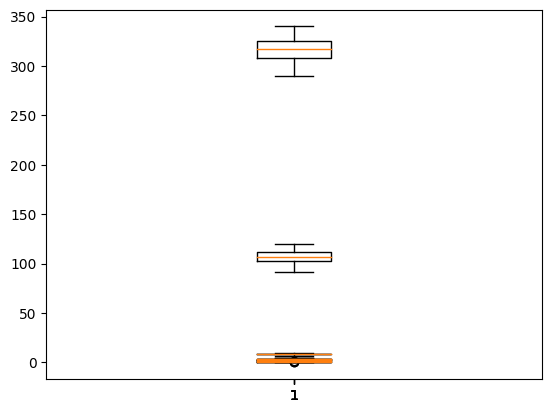

In [10]:
for col in df.columns:
    plt.boxplot(df[col])

In [72]:
for column in ['university_rating' , 'research' ]:
    dummies = pd.get_dummies(df[column], prefix=column)
    df[dummies.columns] = dummies
    del df[column]

In [73]:
X = df.drop('admit_chance ' ,axis = 1)
y = df['admit_chance ']


In [74]:
X_train, X_test, y_train, y_test = train_test_split(
 X, y, test_size=0.33, random_state=42)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gre                  500 non-null    int64  
 1   toefl                500 non-null    int64  
 2   sop                  500 non-null    float64
 3   lor                  500 non-null    float64
 4   gpa                  500 non-null    float64
 5   admit_chance         500 non-null    float64
 6   university_rating_1  500 non-null    uint8  
 7   university_rating_2  500 non-null    uint8  
 8   university_rating_3  500 non-null    uint8  
 9   university_rating_4  500 non-null    uint8  
 10  university_rating_5  500 non-null    uint8  
 11  research_0           500 non-null    uint8  
 12  research_1           500 non-null    uint8  
dtypes: float64(4), int64(2), uint8(7)
memory usage: 27.0 KB


In [80]:
model = RandomForestRegressor(max_depth=2, random_state=0)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, random_state=0)

In [81]:
df

,gre,toefl,sop,lor,gpa,admit_chance,university_rating_1,university_rating_2,university_rating_3,university_rating_4,university_rating_5,research_0,research_1
0,337,118,4.5,4.5,9.65,0.92,0,0,0,1,0,0,1
1,324,107,4.0,4.5,8.87,0.76,0,0,0,1,0,0,1
2,316,104,3.0,3.5,8.00,0.72,0,0,1,0,0,0,1
3,322,110,3.5,2.5,8.67,0.80,0,0,1,0,0,0,1
4,314,103,2.0,3.0,8.21,0.65,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,332,108,4.5,4.0,9.02,0.87,0,0,0,0,1,0,1
496,337,117,5.0,5.0,9.87,0.96,0,0,0,0,1,0,1
497,330,120,4.5,5.0,9.56,0.93,0,0,0,0,1,0,1
498,312,103,4.0,5.0,8.43,0.73,0,0,0,1,0,1,0


In [82]:
model.predict([[330,100,3.0,4.5,9.56,0,0,1,0,0,1,0]])

c:\users\eyyub muellim\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([0.91185417])

In [84]:
pickle.dump(model, open("model.pkl", "wb"))